In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [118]:
breast = datasets.load_breast_cancer()
X = breast.data
y = breast.target
ncol = X.shape[1]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [120]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [121]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [122]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[44  3]
 [ 2 65]]
Accuracy: 0.956140350877193


In [123]:
lda = LDA(n_components=1) # if we want more features rather one feature, we should select other dimension reduction algorithm

X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [124]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [125]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[45  2]
 [ 1 66]]
Accuracy: 0.9736842105263158


In [126]:
lda_feature = pd.DataFrame(data=X_train, columns=['linear discriminant 1'])
lda_label = pd.DataFrame(data=y_train, columns=['label'])
lda_label['label'].replace(0, 'Benign', inplace=True)
lda_label['label'].replace(1,'Malignant', inplace=True)
lda_label.shape
#labels = np.reshape(breast_labels, (569, 1))

(455, 1)

In [127]:
lda_label == target

,label
0,False
1,False
2,False
3,False
4,False
...,...
450,True
451,True
452,False
453,False


<Figure size 432x288 with 0 Axes>

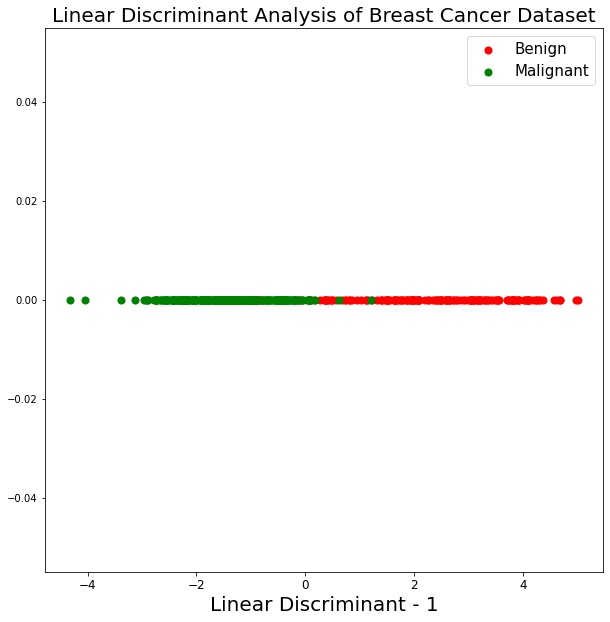

In [135]:
# visualizing the transformed variables by plotting the two linear discriminant
plt.figure()
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12)
#plt.yticks(fontsize=14)
plt.xlabel('Linear Discriminant - 1', fontsize=20)
plt.title ("Linear Discriminant Analysis of Breast Cancer Dataset", fontsize=20)
targets=['Benign', 'Malignant']
colors=['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = lda_label['label'] == target
    y = np.zeros(lda_feature.loc[indicesToKeep,'linear discriminant 1'].shape)
    plt.scatter(lda_feature.loc[indicesToKeep,'linear discriminant 1'], y, c=color, s=50)
plt.legend(targets, prop={'size': 15})
plt.show()